In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#To load dataset
df=pd.read_csv("/content/drive/MyDrive/deep learning /insurance (2).csv")

In [ ]:
#to display first 5 record 
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
#This is a classification dataset which want to predict Either customer claim
#for insurance or not means to predict yes or no value means 0 or 1

In [ ]:
#basic steps : check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
#separate input and output from dataset
X=df.drop("insuranceclaim",axis=1) #input features
Y=df["insuranceclaim"] #target means output variable

In [ ]:
#train_test_split (70% and 30%) first call class
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#scaling apply on input data X_train and X_test 
#use StandardScaler class (formula z-score=X-mean(X)/std(X))
from sklearn.preprocessing import StandardScaler

#create object of StandardScaler class
ss=StandardScaler()
#scaling on training input data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:

#create the object of Sequential class and pass the list of this class
model=tf.keras.Sequential([
      tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)), #hidden layer1
      tf.keras.layers.Dense(3,activation='relu'), #hidden layes2
      tf.keras.layers.Dense(1,activation='sigmoid') #output layer
])


In [ ]:
#How many columns in dataset
X.shape[1]

7

In [ ]:
#To show the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy') #if classification dataset
#then loss='binary_crossentropy' and if regression problem then assign loss='mse'
#binary means 0 or 1

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,epochs=50)
#1 epoch =1 Forward +1 Backward propagation epoch means iterations


Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7092
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7045
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6689
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6510
Epoch 5/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6385
Epoch 6/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6289
Epoch 7/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6308
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6144
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6218
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6066
Epoch 11/50
30/30 [==============================] - 0s 1ms/step - loss: 0.6124
Epoch 12/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5996
Epoch 13/50
30/30 [==============================

In [ ]:
 #trained model on 30 samples in each iteration

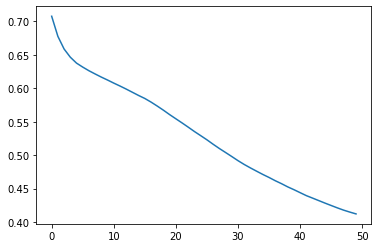

In [ ]:
#visualise the history of loss of trained model
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
#predict means testing the model means use inbuilt method predict()
Y_pred=model.predict(X_test)

In [ ]:
Y_pred

array([[0.83698493],
       [0.83698493],
       [0.85365045],
       [0.24347225],
       [0.08731887],
       [0.851482  ],
       [0.70713353],
       [0.8148862 ],
       [0.54234385],
       [0.83698493],
       [0.6189727 ],
       [0.9075464 ],
       [0.2935385 ],
       [0.3548404 ],
       [0.83698493],
       [0.2452752 ],
       [0.63456976],
       [0.01799294],
       [0.89401543],
       [0.87576956],
       [0.83698493],
       [0.8779371 ],
       [0.6872743 ],
       [0.70356315],
       [0.6410974 ],
       [0.42550907],
       [0.03707981],
       [0.8527857 ],
       [0.20756939],
       [0.529165  ],
       [0.875707  ],
       [0.1142416 ],
       [0.23493743],
       [0.83698493],
       [0.3524446 ],
       [0.6383106 ],
       [0.83698493],
       [0.08153722],
       [0.87316686],
       [0.84542966],
       [0.19326097],
       [0.8464482 ],
       [0.05978653],
       [0.8783017 ],
       [0.02798784],
       [0.8478426 ],
       [0.8416321 ],
       [0.836

In [ ]:
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [ ]:
Y_pred

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
#Evaluation of model using classification_report inbuilt class
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       157
           1       0.89      0.90      0.89       245

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



In [ ]:
#Evaluation of model using classification_report inbuilt class
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[129  28]
 [ 25 220]]
